## Level of sharing/concordance of caQTLS between the cell types in our study
- **Rev1.4**  *Compare quality control metrics and association results between those caQTLs that are cell-type specific versus those that are shared. Many of your QTLs are cell-type specific, which is not in keeping with observations in other studies (see the GTEx papers, and PMIDs: 28814792, 29379200 and many more). One interpretation of the cell-type specificity is that they are hugely enriched with false-positives and thus do not replicate in the other cell-types.*
- **Rev2.7**   *I was unsure of the level of concordance of cAQTL effects between the different major celltypes. Figure 2A illustrates overlap or not between major cell types. But this could be related to power, rather than true biological differences. Have the authors done an interaction analysis to identify caQTLs with evidence of cell type specific effects?*
 
QTL sharing is estimated as the proportion of true associations π1 among the QTLs from a first cell type in a second cell type, using the qvalue function (Storey and Tibshirani, 2003; Nica et al., 2011; Chen et al. Cell, 2016 Blueprint; Alasoo (gaffney)et al nat genet 2016). We employed qvalue to compute π1 as 1−π0, where π0 is the estimated proportion of truly null associations. Cell type specificity was estimated as 1 minus the average of π1 values from one cell type in the others.

In [6]:
library(qvalue)
library(repr)
library(pheatmap)
library(fdrtool)
library(data.table)

In [7]:
setwd('/nfs/lab/projects/pbmc_snATAC/analysis_v2')

longf         = read.table('summarized_caqtls/run3/EUR_caqtl_leads_run3.tsv', header=T)
longf$exclude = longf$Sequencing_mapping_error_rate>0.1 | longf$Ref_allele_bias<0.2 | longf$Ref_allele_bias>0.8

bc = c('b', "t",'mono',  'nk')
cs =  c("bulk", bc, as.character(read.table("peaks/color_scheme.tsv")[1:15,2]))

cells = data.frame(celltypes = cs, type = c("bulk", rep("broad", 4), rep("fine", 15)))

main      = '/nfs/lab/projects/pbmc_snATAC/analysis_v2/rasqual_eur/'

In [8]:
home =   '/nfs/lab/projects/pbmc_snATAC/analysis_v2/summarized_caqtls/run3/'

In [15]:
length(unique(longf$Feature[longf$cell !='bulk' & longf$flag_fdr05==TRUE & longf$exclude==FALSE]))
length(unique(longf$Feature[longf$cell %in% cells$celltypes[cells$type=="fine"] & longf$flag_fdr05==TRUE & longf$exclude==FALSE]))
length(unique(longf$Feature[longf$cell %in% bc & longf$flag_fdr05==TRUE & longf$exclude==FALSE]))


[1] 4220

[1] 3162

[1] 3654

In [62]:
cells$group = c('bulk', 'group_b', 'group_t', 'group_mono', 'group_nk', rep('group_mono',4), 'group_b','group_b','group_nk','group_nk',
rep("group_t", 6), "mkc")

In [7]:
celltypes = as.character(cells[,1])[1:5]

In [95]:
celltypes =as.character(cells[,1])

In [148]:
pmat = matrix(NA, ncol=length(celltypes), nrow=length(celltypes))
colnames(pmat)= rownames(pmat) = celltypes
pmat2 = pmat
for(ce in celltypes){
res = subset(longf, cell==ce & flag_fdr10==TRUE & exclude==FALSE)
qt  = res[,c('Feature', "varID")]
    for(ce2 in celltypes){
        if(ce2 == ce){
            pmat[ce,ce2] = pmat2[ce,ce2]=1
        }else{
        
        ## feature & variant
        #res2 = fread(paste0(home, ce2, "_caqtl_sumstats_run3.tsv"), header=T)
        #res2 =  merge(qt, res2, by=c('Feature','varID'))
           
            # only feature
            res2 = subset(longf, cell==ce2 & Feature %in% qt$Feature)
            res2$P_value= res2$P_VAl
            
            
        pv2 = c(na.omit(res2$P_value), 1) #### escamotage
            qobj <- qvalue(pv2, method = "boostrap")
        pmat[ce,ce2] =  1 - qobj$pi0
            #### alternative method 
        pv2 = fdrtool(c(na.omit(res2$P_value), 1), statistic="pvalue", plot=FALSE)
        qobj <- sum(pv2$qval<0.1, na.rm=T)
        pmat2[ce,ce2] =  qobj/nrow(res2)   
            }
    }
}

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
St

Warning message:
“Censored sample for null model estimation has only size 7 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and esti

Warning message:
“Censored sample for null model estimation has only size 4 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and esti

Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 9 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and esti

Warning message:
“Censored sample for null model estimation has only size 3 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and esti

Warning message:
“Censored sample for null model estimation has only size 6 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and esti

Warning message:
“Censored sample for null model estimation has only size 7 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 4 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 9 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and esti

Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 5 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 2 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and esti

Warning message:
“Censored sample for null model estimation has only size 6 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 3 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 9 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 6 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 7 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 6 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 1 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 1 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 2 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 2 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 5 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 3 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 2 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 3 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 3 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 2 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 3 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 2 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 3 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 3 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 4 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 3 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 2 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 4 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 2 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 8 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 6 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 5 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 4 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 3 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 5 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 8 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 4 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 4 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 5 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 6 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 2 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 5 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 5 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 9 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 2 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 2 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 6 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 5 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 1 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 3 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and esti

Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 4 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 3 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 6 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
St

Warning message:
“Censored sample for null model estimation has only size 2 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 7 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 9 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and esti

Warning message:
“Censored sample for null model estimation has only size 7 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 5 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 3 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 4 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 6 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 3 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 6 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 9 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 4 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 3 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 2 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 4 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 2 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 3 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 2 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 3 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 5 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 4 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 4 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 4 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 7 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 4 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 6 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 8 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 6 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and esti

Warning message:
“Censored sample for null model estimation has only size 8 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and esti

Warning message:
“Censored sample for null model estimation has only size 7 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 5 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 4 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 5 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 8 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 4 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 6 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and esti

Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 3 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and esti

Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 5 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 3 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 1 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 7 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 5 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 5 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 6 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 7 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 9 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 4 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 4 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 3 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 1 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 9 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 9 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 7 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 7 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 9 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 5 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 8 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 5 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 5 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0


Warning message:
“Censored sample for null model estimation has only size 7 !”


Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



Warning message in fdrtool(c(na.omit(res2$P_value), 1), statistic = "pvalue", plot = FALSE):
“There may be too few input test statistics for reliable FDR calculations!”


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr



### Version fetaure + SNP

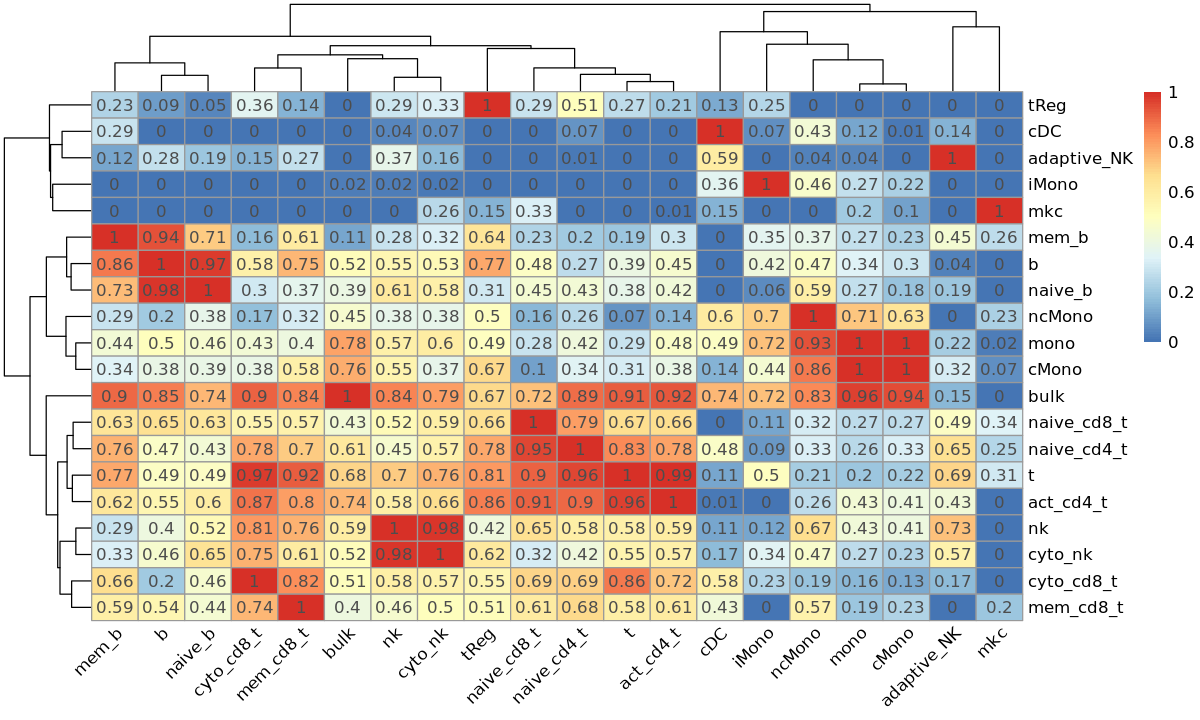

In [143]:
options(repr.plot.width=10, repr.plot.height=6)
pheatmap (t(pmat), cluster_rows = T, cluster_cols = T, display_numbers = round(t(pmat),2), 
          angle_col = 45, fontsize_number = 10)


In [65]:
group_b=cells[cells$group=="group_b", 1]
group_t=cells[cells$group=="group_t", 1]
group_mono=cells[cells$group=="group_mono", 1]
group_nk=cells[cells$group=="group_nk", 1]

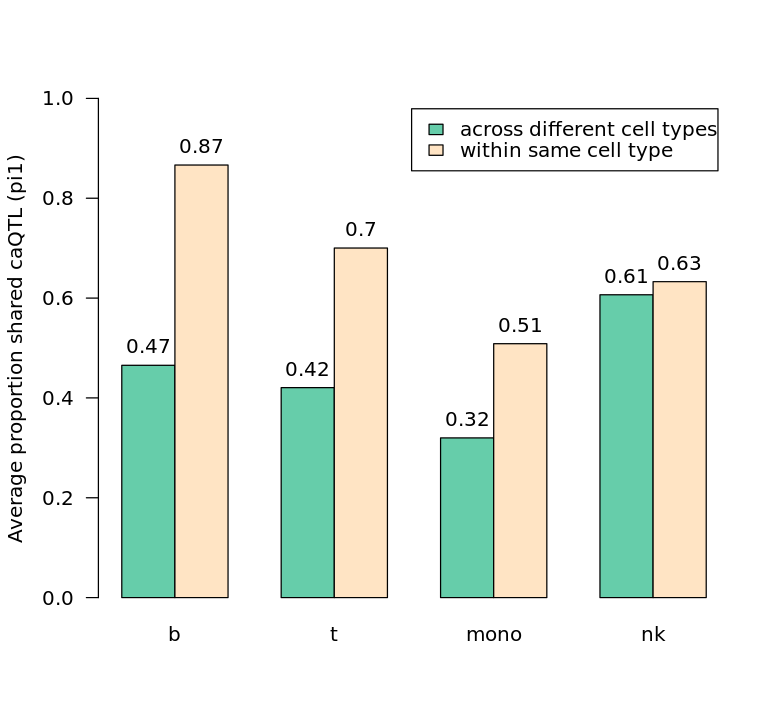

In [114]:
options(repr.plot.width=6.5, repr.plot.height=6)
pmatNA = pmat
pmatNA[pmatNA==1]<-NA
spec = rowMeans(pmatNA[2:5,2:5], na.rm=T)
specb= mean(rowMeans(pmatNA[group_b,group_b], na.rm=T))
spect= mean(rowMeans(pmatNA[group_t,group_t], na.rm=T))
specm= mean(rowMeans(pmatNA[group_mono,group_mono], na.rm=T))
specn= mean(rowMeans(pmatNA[group_nk,group_nk], na.rm=T))
within = c(specb,spect,specm,specn)

bp = barplot(t(cbind(spec, within)), las=2, ylab="Average proportion shared caQTL (pi1)", 
             col=c("aquamarine3", "bisque"), 
             legend.text = c("across different cell types", "within same cell type"),
             beside =T, ylim=c(0,1), las=1)
text(bp,t(cbind(spec, within)), round(t(cbind(spec, within)), 2), pos=3)

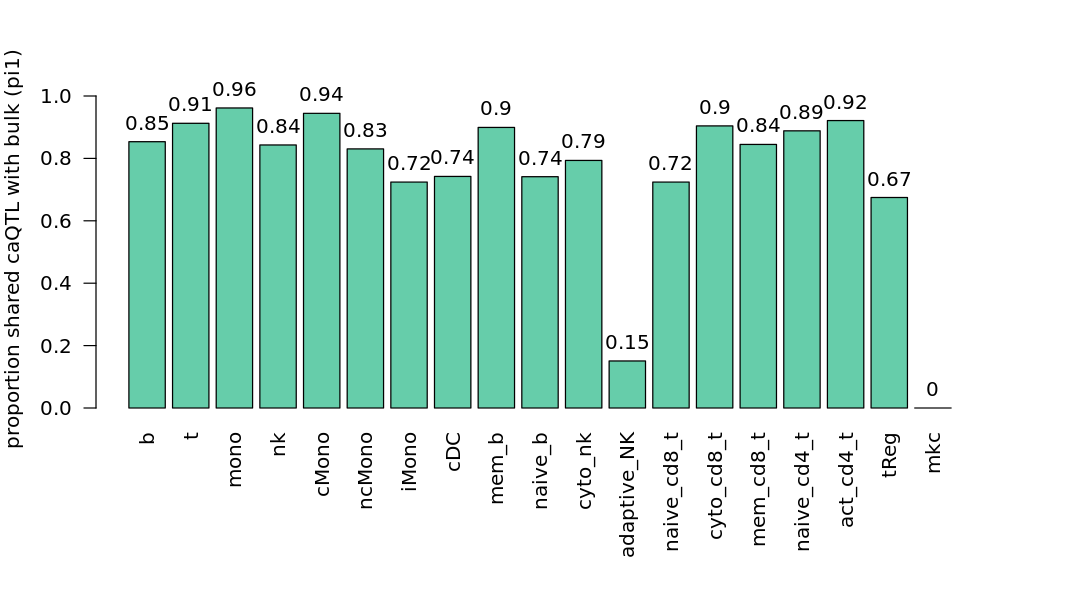

In [141]:
options(repr.plot.width=9, repr.plot.height=5)
par(xpd=T,mar=c(8,4,4,4))
cells_to_bulk= pmatNA[-1,1]
#cells_to_bulk = sort(cells_to_bulk,decreasing = T)
bp = barplot(cells_to_bulk, las=2, ylab=" proportion shared caQTL with bulk (pi1)", 
             col=c("aquamarine3"),  ylim=c(0,1), las=2)
text(bp,cells_to_bulk, round( cells_to_bulk, 2), pos=3)

In [138]:
mean(cells_to_bulk)
median(cells_to_bulk)

[1] 0.7554572

[1] 0.8430453

### Version only feature

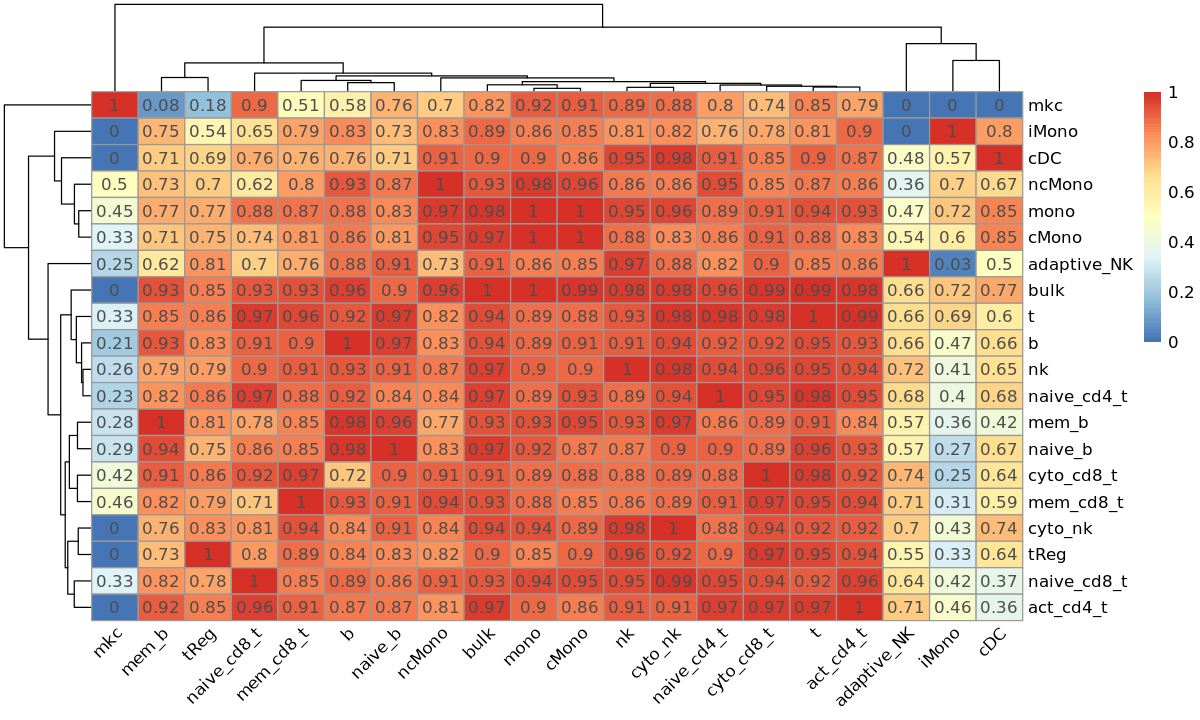

In [149]:
options(repr.plot.width=10, repr.plot.height=6)
pheatmap (t(pmat), cluster_rows = T, cluster_cols = T, display_numbers = round(t(pmat),2), 
          angle_col = 45, fontsize_number = 10)


In [150]:
group_b=cells[cells$group=="group_b", 1]
group_t=cells[cells$group=="group_t", 1]
group_mono=cells[cells$group=="group_mono", 1]
group_nk=cells[cells$group=="group_nk", 1]

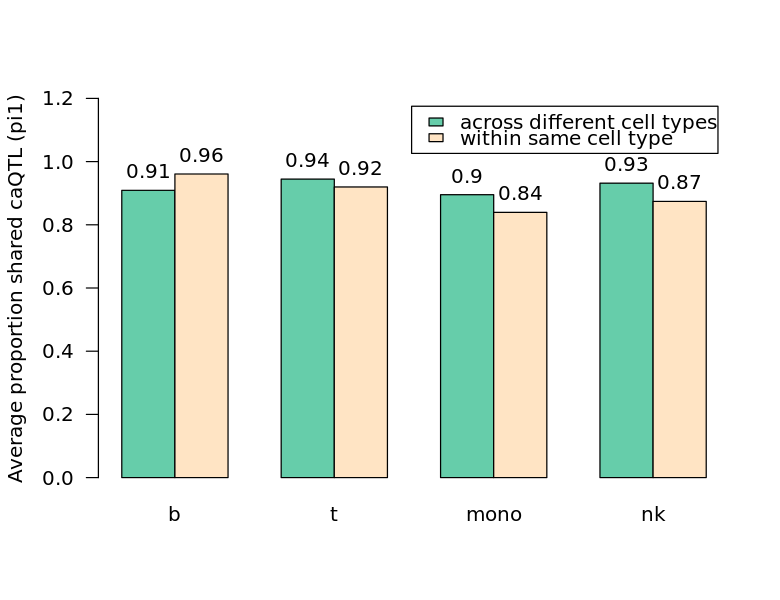

In [153]:
options(repr.plot.width=6.5, repr.plot.height=5)
pmatNA = pmat
pmatNA[pmatNA==1]<-NA
spec = rowMeans(pmatNA[2:5,2:5], na.rm=T)
specb= mean(rowMeans(pmatNA[group_b,group_b], na.rm=T))
spect= mean(rowMeans(pmatNA[group_t,group_t], na.rm=T))
specm= mean(rowMeans(pmatNA[group_mono,group_mono], na.rm=T))
specn= mean(rowMeans(pmatNA[group_nk,group_nk], na.rm=T))
within = c(specb,spect,specm,specn)

bp = barplot(t(cbind(spec, within)), las=2, ylab="Average proportion shared caQTL (pi1)", 
             col=c("aquamarine3", "bisque"), 
             legend.text = c("across different cell types", "within same cell type"),
             beside =T, ylim=c(0,1.2), las=1)
text(bp,t(cbind(spec, within)), round(t(cbind(spec, within)), 2), pos=3)

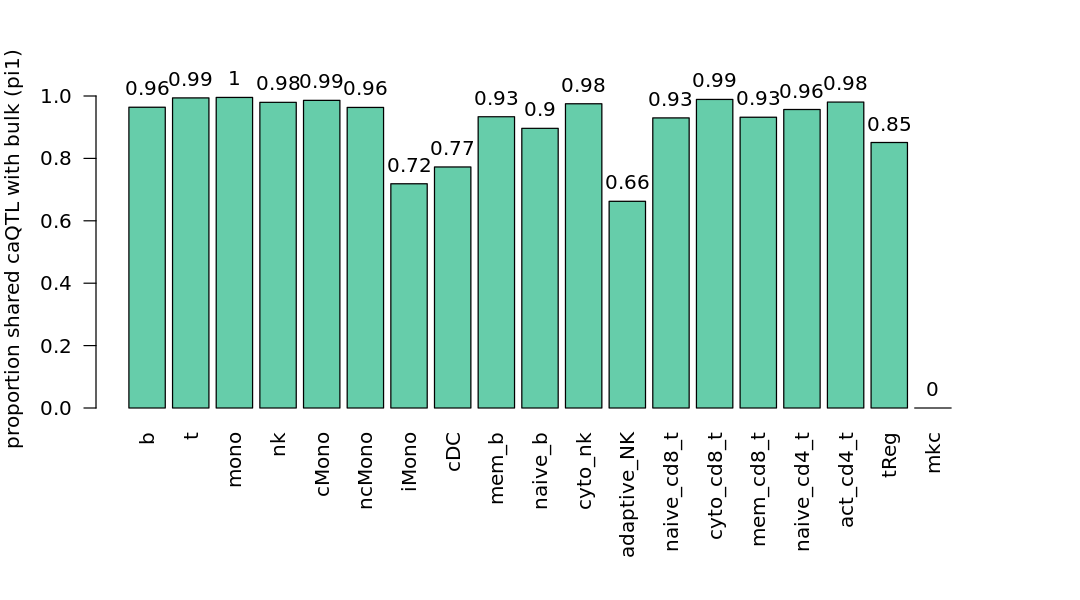

In [154]:
options(repr.plot.width=9, repr.plot.height=5)
par(xpd=T,mar=c(8,4,4,4))
cells_to_bulk= pmatNA[-1,1]
#cells_to_bulk = sort(cells_to_bulk,decreasing = T)
bp = barplot(cells_to_bulk, las=2, ylab=" proportion shared caQTL with bulk (pi1)", 
             col=c("aquamarine3"),  ylim=c(0,1), las=2)
text(bp,cells_to_bulk, round( cells_to_bulk, 2), pos=3)

In [159]:
pi    = setNames(rep(NA,19),celltypes[-1])
fract = pi
numb  = pi 
for(ce in celltypes[-1]){
res = subset(longf, cell==ce & flag_fdr10==TRUE & exclude==FALSE)
qt  = res[,c('Feature', "varID")]
numb[ce]<- nrow(qt)    
            
            # only feature
            res2 = subset(longf, cell=='bulk' & Feature %in% qt$Feature)
            res2$P_value= res2$P_VAl
            fract[ce]<- sum(res2$flag_fdr10==TRUE & res2$exclude==FALSE)/ nrow(qt) 
            
        pv2 = c(na.omit(res2$P_value), 1) #### escamotage
            qobj <- qvalue(pv2, method = "boostrap")
        pi[ce] =  1 - qobj$pi0
            #### alternative method 
       # pv2 = fdrtool(c(na.omit(res2$P_value), 1), statistic="pvalue", plot=FALSE)
       # qobj <- sum(pv2$qval<0.1, na.rm=T)
       # pmat2[ce,ce2] =  qobj/nrow(res2)   
            }
    


In [1]:
#cbind( numb, fract,pi)

**Note**The pi1 statistics assumes that the p-values are uniformly distributed, which is not the case as they are skewerd to one (see below, also found elsewhere in rasqual, and also the creator said that in the github) - so perhaps this is not the best method, can be included maybe in the suplementary or if the new qtl show more uniform p-value distributions.  ALso the qvalue functiona does not work with truncated p-value list, that't why I used the escamotage of adding the 1 to the list.

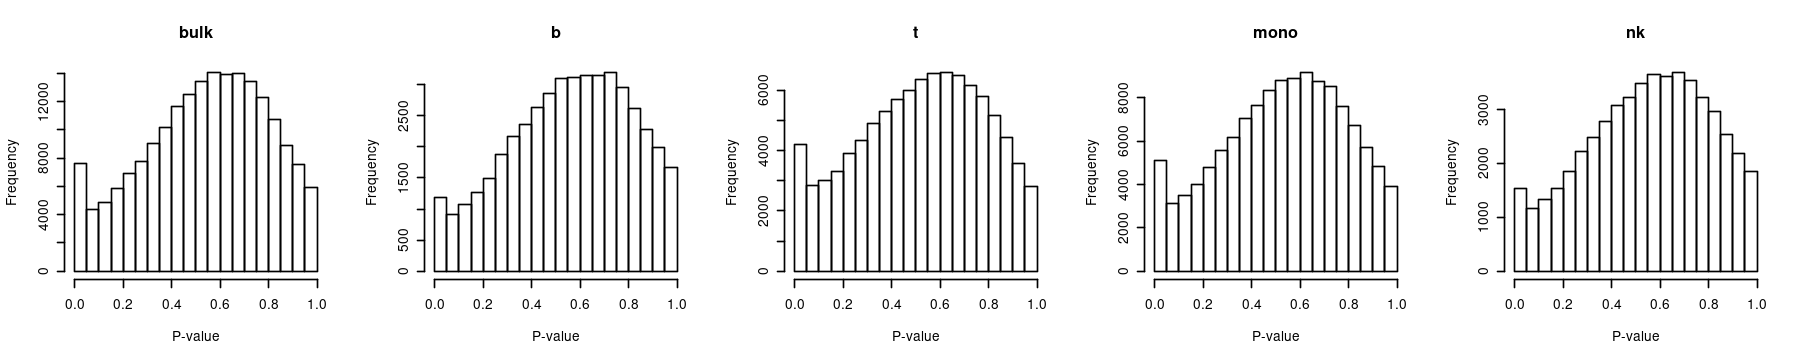

In [27]:
options(repr.plot.width=15, repr.plot.height=3)
par(mfcol = c(1,5))
for(ce in celltypes){
res = subset(longf, cell==ce)
#res = read.table(paste0(home, ce, "/Results_run4_all.tsv"), header=T)
hist(res$P_VAl, main = ce, xlab="P-value")
     

}